# K-Means Clustering

Algoritma KMeans pada dasarnya mencari titik-titik cluster sehingga setiap data dengan suatu titik cluster terpendek merupakan bagian dari cluster tersebut bukan cluster lain.

Cara kerja:
1. Tentukan jumlah K cluster
2. Pilih sejumlah K titik random sebagai titik cluster (centroids)
3. Hitung jarak tiap data ke titik-titik cluster. Jika data memiliki jarak terpendek pada suatu cluster dibanding jarak ke cluster lain. maka data tersebut masuk ke dalam cluster tersebut.
4. Hitung rata-rata data suatu cluster. Perhitungan ini dilakukan pada seluruh cluster. Hasil rata-rata ini merupakan titik baru cluster.
5. Kembali ke langkah 3 jika memang ada titik baru cluster. jika tidak maka selesai

Untuk menentukan kelas suatu data produksi, maka menghitung jarak ke titik cluster. jarak ke cluster terpendek lah yang akan dijadikan kelas pada data produksi tersebut

Note:jarak antar data dapat menggunakan euclidian distance atau manhattan atau lainnya

##Random initialization error

Terkadang inisialisasi K titik random, akan menghasilkan cluster yang salah contohnya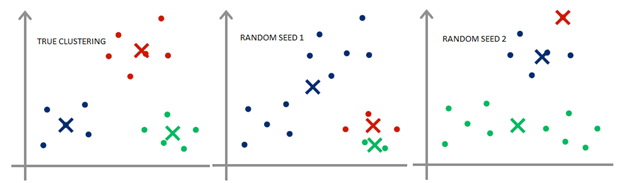

Seharusnya hasil clustering seperti sebelah kiri gambar, bukan gambar lainnya. hal ini terjadi ketika inisialisasi centroid salah penempatannya

Untuk mengatasi ini kita dapat menggunakan inisialisasi K-means++

##Jumlah cluster optimal

Untuk menentukan jumlah cluster optimal kita harus mengetahui elbow method terlebih dahulu. Elbow method menggunakan tools WCSS. WCSS adalah jumlah kuadrat dari elemen-elemen cluster terhadap centoridnya.

$WCSS=∑_{i} D(P_i,C_1)+...+∑_{n} D(P_n,C_k)$

Jika hanya memiliki 1 centroid tentu saja WCSS akan besar, jika bertambah centroidnya nilai WCSS akan menurun. Jika kita terus tambahkan centroidnya tentu saja nilai WCSS akan terus menurun. tetapi nilai WCSS akan menurun tidak secara signifikan jika kita terus tambah centroidnya. oleh karena itu untuk menentukan jumlah centroid yang optimal kita hanya harus memilih kira-kira jumlah n centroid yang nilai WCSS nya tengah-tengah antara perubahan WCSS yang signifikan dan perubahan WCSS yang tidak terlalu signifikan.

Contohnya



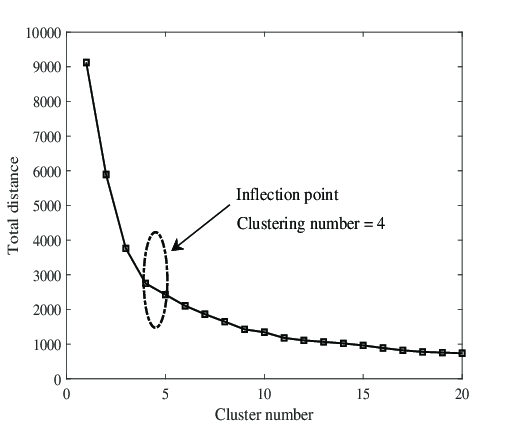

Bisa terlihat pada contoh, k=4 adalah optimal karena pada sebelah kiri perubahan WCSS signifikan, sedangkan sebelah kanan perubahan WCSS sangat tidak signifikan

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
X=dataset.iloc[:,1:].values

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoding',OrdinalEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X)

Pada algoritma k-means lebih cocok menggunakan ordinalEncoder dibanding onehotencoder pada feature string. Karena meskipun onehotencoder cocok untuk feature string yang tidak ada urutannya, tetapi onehotencoder akan menambah dimensi untuk 1 kategori berbeda. Sedangkan pada kmeans tidak terlalu mementingkan besar atau kecil nilai suatu dimensi yang penting adalah kedekatan antar data, sehingga meskipun pada akhirnya ordinalencoder akan menciptakan ranking/urutan pada categorical/string feature ini bukanlah masalah. Dan dengan menambahnya dimensi berarti membutuhkan daya komputasi lebih, sehingga onehotencoder kurang cocok.

## Using the elbow method to find the optimal number of clusters

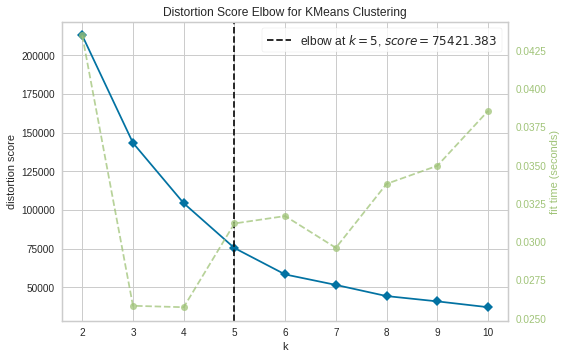

In [ ]:
#dengan library
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(),k=10)
visualizer.fit(X)
visualizer.show()

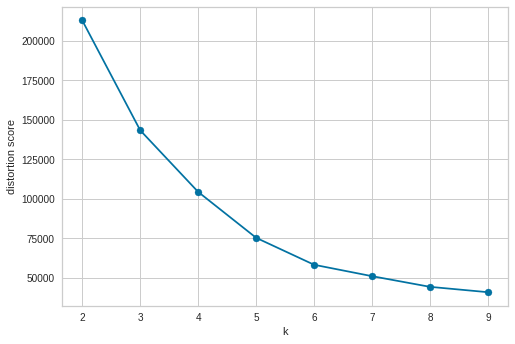

In [ ]:
#tanpa library untuk menampilkan elbow method
from sklearn.cluster import KMeans
start_k=2
stop_k=9
list_distortion=[]
for i in range(start_k,stop_k+1):
  model=KMeans(i,random_state=0)
  model.fit(X)
  list_distortion.append(model.inertia_)
plt.plot(range(start_k,stop_k+1),list_distortion)
plt.scatter(range(start_k,stop_k+1),list_distortion)
plt.ylabel("distortion score")
plt.xlabel("k")
plt.show()

## Training the K-Means model on the dataset

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(5,random_state=0)
cluster.fit(X)
print(cluster.labels_)
print("Cluster centers : \n",cluster.cluster_centers_)
y_kmeans = cluster.labels_

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Cluster centers : 
 [[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


## Visualising the clusters

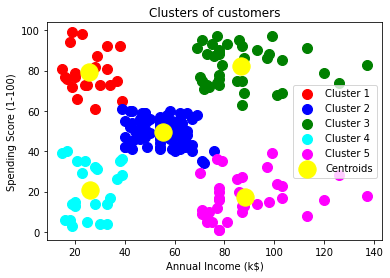

In [ ]:
#visualisasi dengan 2 independent variables
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()